# [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster "sklearn.cluster").KMeans[¶](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn-cluster-kmeans "Permalink to this heading")

_class_ sklearn.cluster.KMeans(_n_clusters=8_,  _*_,  _init='k-means++'_,  _n_init='warn'_,  _max_iter=300_,  _tol=0.0001_,  _verbose=0_,  _random_state=None_,  _copy_x=True_,  _algorithm='lloyd'_



Parameters:

**n_clusters**int, default=8

The number of clusters to form as well as the number of centroids to generate.

**init**{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’

Method for initialization:

‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

‘random’: choose  `n_clusters`  observations (rows) at random from data for the initial centroids.

If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

**n_init**‘auto’ or int, default=10

Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of  `n_init`  consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems (see  [Clustering sparse data with k-means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#kmeans-sparse-high-dim)).

When  `n_init='auto'`, the number of runs will be 10 if using  `init='random'`, and 1 if using  `init='kmeans++'`.

New in version 1.2: Added ‘auto’ option for  `n_init`.

Changed in version 1.4: Default value for  `n_init`  will change from 10 to  `'auto'`  in version 1.4.

**max_iter**int, default=300

Maximum number of iterations of the k-means algorithm for a single run.

**tol**float, default=1e-4

Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.

**verbose**int, default=0

Verbosity mode.

**random_state**int, RandomState instance or None, default=None

Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. See  [Glossary](https://scikit-learn.org/stable/glossary.html#term-random_state).

**copy_x**bool, default=True

When pre-computing distances it is more numerically accurate to center the data first. If copy_x is True (default), then the original data is not modified. If False, the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean. Note that if the original data is not C-contiguous, a copy will be made even if copy_x is False. If the original data is sparse, but not in CSR format, a copy will be made even if copy_x is False.

**algorithm**{“lloyd”, “elkan”, “auto”, “full”}, default=”lloyd”

K-means algorithm to use. The classical EM-style algorithm is  `"lloyd"`. The  `"elkan"`  variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape  `(n_samples,  n_clusters)`.

`"auto"`  and  `"full"`  are deprecated and they will be removed in Scikit-Learn 1.3. They are both aliases for  `"lloyd"`.

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris =load_iris()

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [7]:
## kmeans
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)

# 붓꽃 데이이터 에 군집화
kmeans.fit(iris_df)

print(kmeans.labels_)
iris_df['cluster'] = kmeans.labels_

C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
iris_df['target'] = iris.target

iris_result = iris_df.groupby(['target','cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


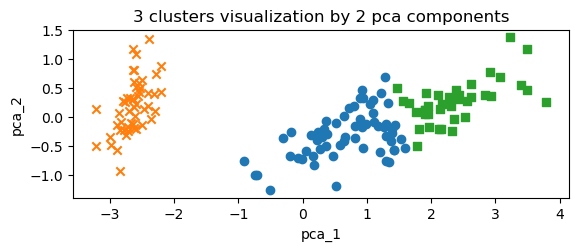

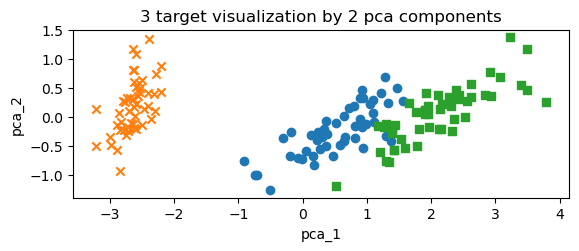

In [31]:
## cluster 값에 대한 시각화
mk0_ind = iris_df[iris_df['cluster']==0].index
mk1_ind = iris_df[iris_df['cluster']==1].index
mk2_ind = iris_df[iris_df['cluster']==2].index
plt.subplot(2,1,1)
plt.scatter(x=iris_df.loc[mk0_ind,'pca_x'],y=iris_df.loc[mk0_ind,'pca_y'],marker='o')
plt.scatter(x=iris_df.loc[mk1_ind,'pca_x'],y=iris_df.loc[mk1_ind,'pca_y'],marker='x')
plt.scatter(x=iris_df.loc[mk2_ind,'pca_x'],y=iris_df.loc[mk2_ind,'pca_y'],marker='s')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('3 clusters visualization by 2 pca components')
plt.show()

## target 값에 대한 시각화
mk0_ind = iris_df[iris_df['target']==1].index
mk1_ind = iris_df[iris_df['target']==0].index
mk2_ind = iris_df[iris_df['target']==2].index
plt.subplot(2,1,2)
plt.scatter(x=iris_df.loc[mk0_ind,'pca_x'],y=iris_df.loc[mk0_ind,'pca_y'],marker='o')
plt.scatter(x=iris_df.loc[mk1_ind,'pca_x'],y=iris_df.loc[mk1_ind,'pca_y'],marker='x')
plt.scatter(x=iris_df.loc[mk2_ind,'pca_x'],y=iris_df.loc[mk2_ind,'pca_y'],marker='s')
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('3 target visualization by 2 pca components')
plt.show()

In [1]:
##### clustering 알고리즘 테스트를 위한 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 클러스터링할 데이터 생성 - make_blobs (생성할 데이터 200개 피쳐 갯수 2개 군집개수 3개, 데이터 표준편차0.8)
x,y = make_blobs(n_samples=200,n_features=2,centers=3, cluster_std=0.8,random_state=0)
print(x.shape,y.shape)

(200, 2) (200,)


In [2]:
# y target 값 의 분포를 확인
unique,counts = np.unique(y,return_counts=True)
print(unique,counts)


[0 1 2] [67 67 66]


In [3]:
import pandas as pd 

cluster_df = pd.DataFrame(data=x, columns=['ftr1','ftr2'])
cluster_df['target']= y

print(cluster_df.shape)
cluster_df.head()

(200, 3)


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


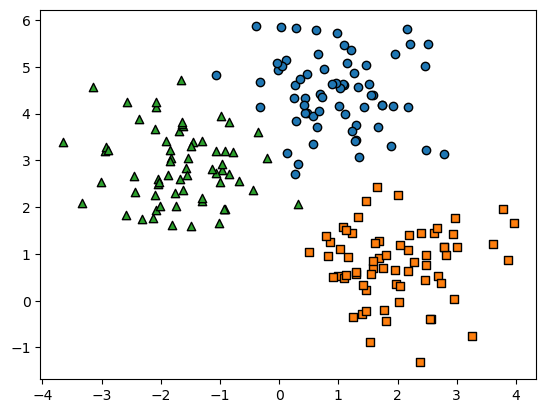

In [4]:
# make_blobs로 만들어진 데이터 시각화
target_list = np.unique(y)

# 각 target별 scatter_plot 의 marker 값
markers= ['o','s','^','P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0,target==1,target==3로 scatterplot 을 marker별로 생성

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],
               edgecolors='k',marker=markers[target])
plt.show()

C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\msi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


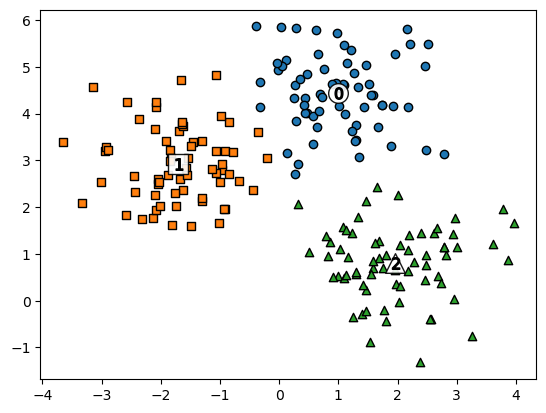

In [9]:
## k-means 군집화 수행하고 개별 클러스터의 군집 중심 시각화

# kmeas 객체를 이용하여 x데이터를 k-means 클러스터링 수행
kmeans = KMeans(n_clusters=3,max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(x)
cluster_df['kmeans_label']= cluster_labels

# cluster centers 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers= ['o','s','^','P','D','H','x']

# 군집된 label유형별러 iteration 하면서 marker 별로 scatter plot 수행

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',
               marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=200,color='white',
               alpha=0.9,edgecolors='k',marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1],s=70,color='k',
               edgecolors='k',marker='$%d$' % label)
plt.show()

In [10]:
# 클러스터 별로 잘 분류 된것을 확인 할 수 있다.
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
